# Импорты и выгрузка

In [1]:
# импортируем все необходимое
import pandas as pd
import numpy as np
from numpy import ravel

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
# выгружаем данные, знакомимся 
df = pd.read_excel('test.xlsx')
df

,ID,Filial,Type_ts,passport_region,VIP,Brand,Model,Yr_production,GAP,married,...,Age,Exp,discount,Amount - gr,sex,premium_car,price_gr,price_prc,OSAGO_clnt,target
0,1,Магнитогорский,Иностранные,Челябинская область,NaN,TOYOTA,RAV 4,2018,Нет,Состоит в браке,...,42,24,1.00,1400000,M,0,55000,0.040,0,0
1,2,Магнитогорский,Отечественные,Челябинская область,NaN,LADA,GRANTA,2016,Нет,Состоит в браке,...,41,4,1.05,200000,M,0,10000,0.010,0,0
2,3,Ростовский,Отечественные,Ростовская область,NaN,LADA,GRANTA,2018,Нет,Не состоит в браке,...,49,20,0.95,400000,F,0,30000,0.065,1,1
3,4,Казанский,Иностранные,Республика Татарстан,NaN,KIA,RIO,2016,Нет,Не состоит в браке,...,40,15,1.10,400000,M,0,10000,0.020,1,0
4,5,Московский,Иностранные,Москва,NaN,DATSUN,ON-DO,2018,Нет,Состоит в браке,...,58,23,1.00,400000,M,0,10000,0.015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,10859,Кемеровский,Иностранные,Кемеровская область,NaN,HYUNDAI,GRAND SANTA FE,2018,Нет,Состоит в браке,...,44,21,1.00,1800000,M,0,70000,0.035,1,-1
10859,10860,Ижевский,Отечественные,Удмуртская Республика,NaN,LADA,GRANTA,2016,Нет,Не состоит в браке,...,33,15,1.00,200000,M,0,20000,0.080,1,-1
10860,10861,Новосибирский,Иностранные,Белгородская область,NaN,KIA,CERATO,2017,Да,Состоит в браке,...,55,36,1.05,600000,F,0,10000,0.010,0,-1
10861,10862,Ростовский,Отечественные,Ростовская область,NaN,LADA,GRANTA,2018,Нет,Состоит в браке,...,60,32,1.00,400000,M,0,30000,0.050,0,-1


# Проведем первичный анализ

In [3]:
# посмотрим на наличие пропущенных значений и типы данных 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10863 entries, 0 to 10862
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10863 non-null  int64  
 1   Filial           10863 non-null  object 
 2   Type_ts          10863 non-null  object 
 3   passport_region  10863 non-null  object 
 4   VIP              284 non-null    object 
 5   Brand            10863 non-null  object 
 6   Model            10863 non-null  object 
 7   Yr_production    10863 non-null  int64  
 8   GAP              10863 non-null  object 
 9   married          10863 non-null  object 
 10  KBM              10863 non-null  int64  
 11  KBM_prol_est     10863 non-null  int64  
 12  delta_kbm        10863 non-null  int64  
 13  deduct           10863 non-null  object 
 14  deduct_amount    10863 non-null  object 
 15  product          10863 non-null  object 
 16  Bank             10863 non-null  object 
 17  channel - ma

In [4]:
# избавимся от nan в колонке VIP, добавив новую категрию
df['VIP'] = df['VIP'].fillna('Без статуса')

In [5]:
# внимательно посмотрим на колонки и на их значения
for col in df.columns[1:]:
    print('Название колонки: ' + col)
    print('Кол-во уникальных значений: ' + str(len(df[col].unique())))
    print(df[col].unique())
    print(df[col].value_counts())
    print('-------')

Название колонки: Filial
Кол-во уникальных значений: 22
['Магнитогорский' 'Ростовский' 'Казанский' 'Московский' 'Самарский'
 'Новосибирский' 'Санкт - Петербургский' 'Белгородский' 'Уфимский'
 'Воронежский' 'Челябинский' 'Екатеринбургский' 'Волгоградский' 'Пермский'
 'Краснодарский' 'Ставропольский' 'Нижегородский' 'Кемеровский' 'Ижевский'
 'Тульский' 'Тверской' 'Дальневосточный']
Московский               3305
Краснодарский            1153
Санкт - Петербургский    1086
Ростовский                553
Воронежский               474
Казанский                 421
Самарский                 394
Магнитогорский            335
Челябинский               320
Пермский                  307
Ижевский                  276
Уфимский                  270
Нижегородский             269
Тверской                  251
Екатеринбургский          243
Ставропольский            234
Волгоградский             232
Новосибирский             186
Белгородский              182
Кемеровский               171
Тульский         

In [6]:
# изменим пустое значение в колонке пол на мужское, так как оно чаще встречается
df['sex'] = ['M' if row == ' ' else row for row in df['sex']]

In [7]:
# поменяем в колонке 0 числовой на 0 строчный
df['deduct_amount'] = ['0' if row == 0 else row for row in df['deduct_amount']]

In [8]:
# объединим колонки бренд и модель в одну колонку, удалим колонки бренд и модель
df['Car']= df['Brand'].astype(str) + ' ' + df['Model'].astype(str)
df = df.drop(['Brand', 'Model'], axis = 1)

In [9]:
# # посмотрим на результат изменений
# print('Кол-во уникальных значений: ' + str(len(df['Car'].unique())))
# print(df['Car'].unique())
# print(df['Car'].value_counts())

# print('Кол-во уникальных значений: ' + str(len(df['deduct_amount'].unique())))
# print(df['deduct_amount'].unique())
# print(df['deduct_amount'].value_counts())

# Визуализируем данные

In [96]:
# создадим дф, где только размеченные данные
df_train = df[:7598]

Filial


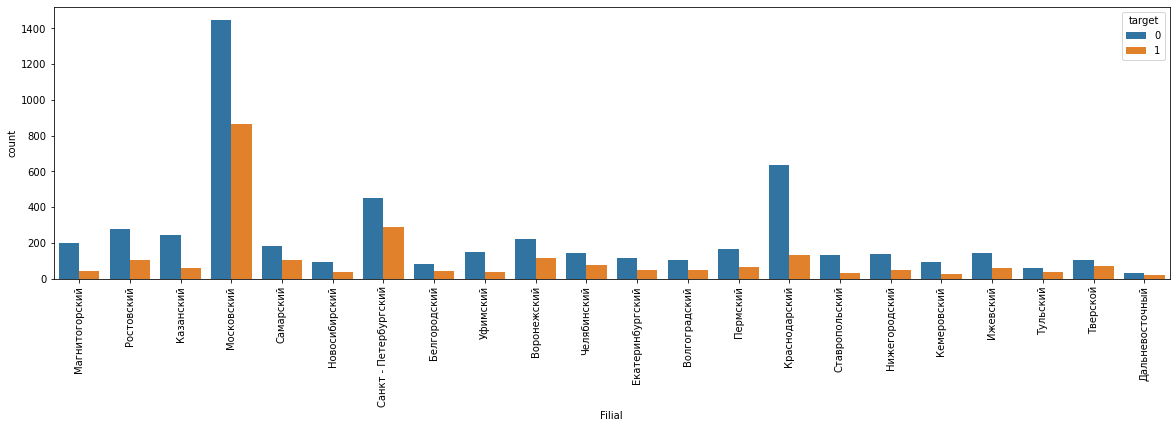

Type_ts


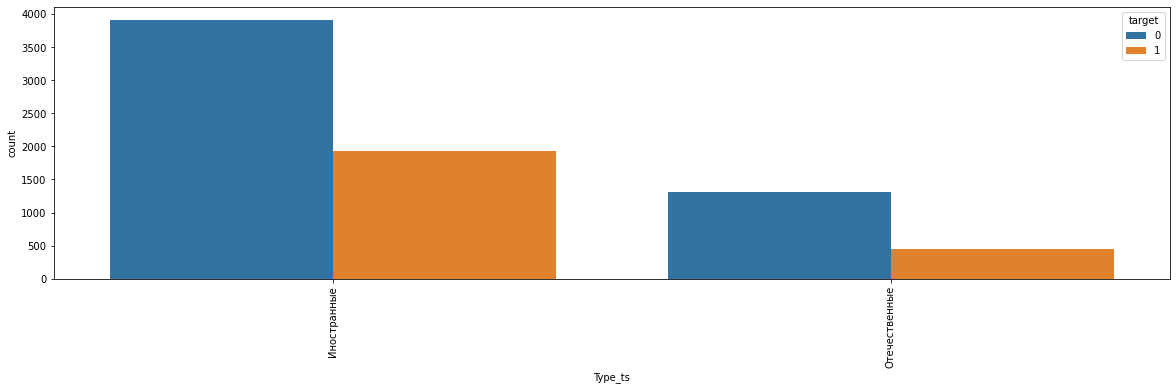

passport_region


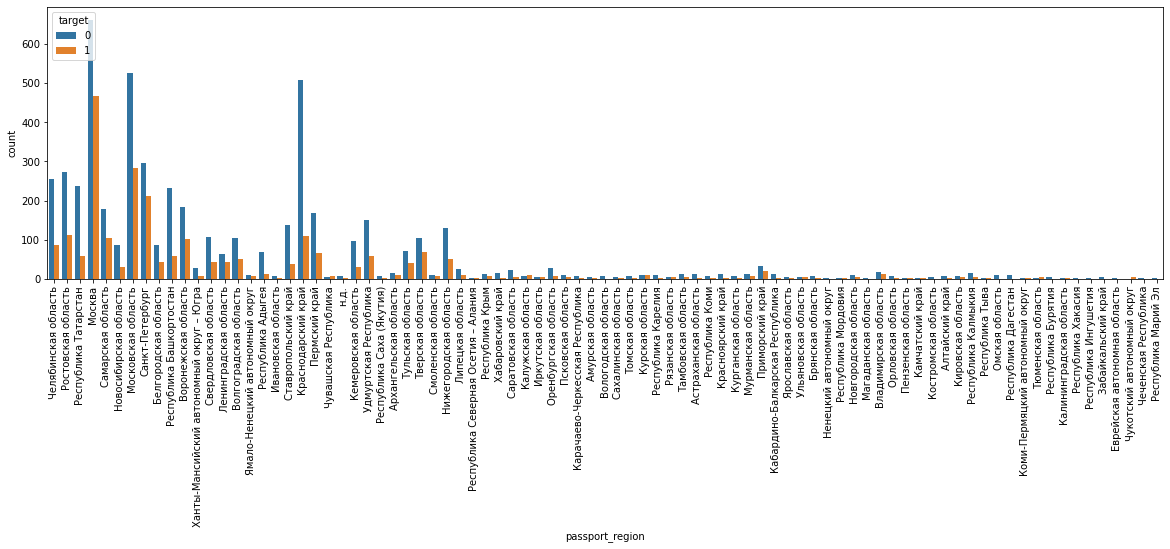

VIP


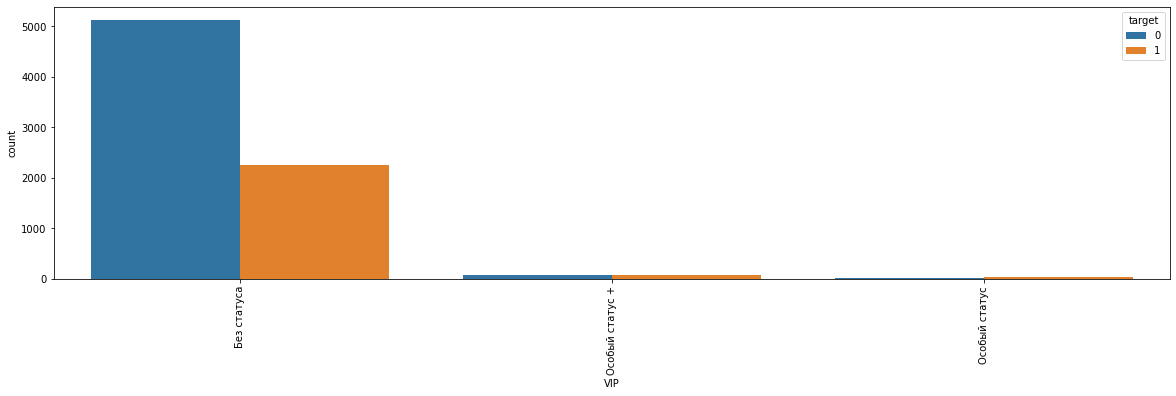

Yr_production


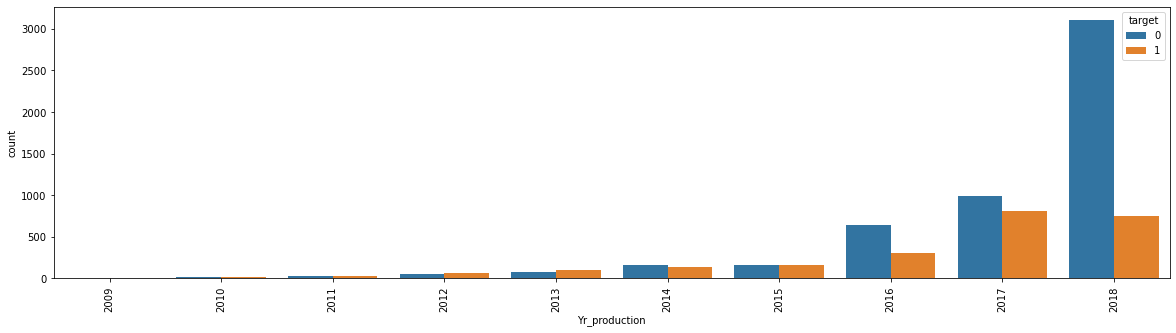

GAP


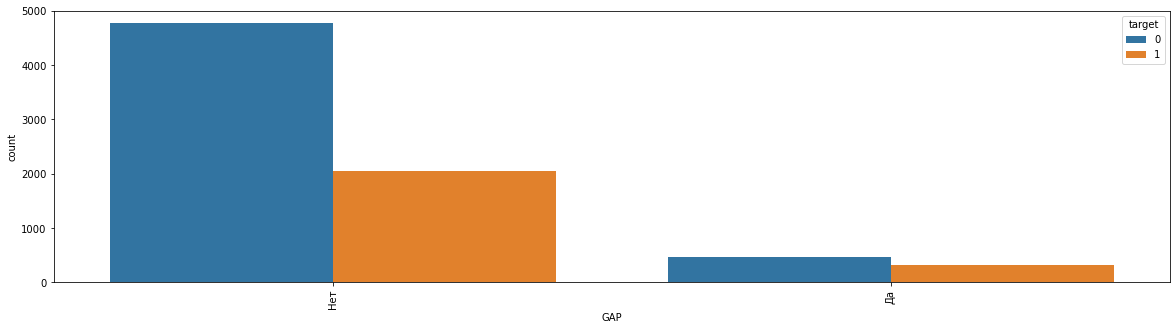

married


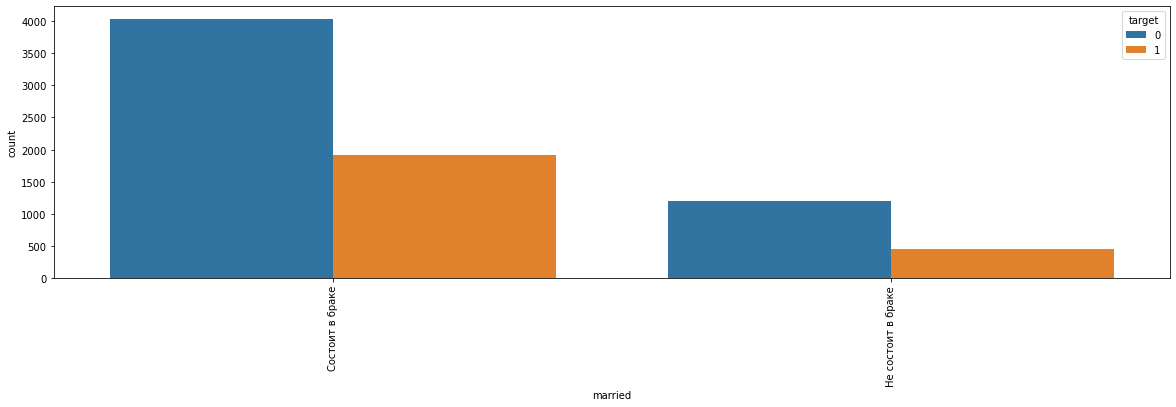

KBM


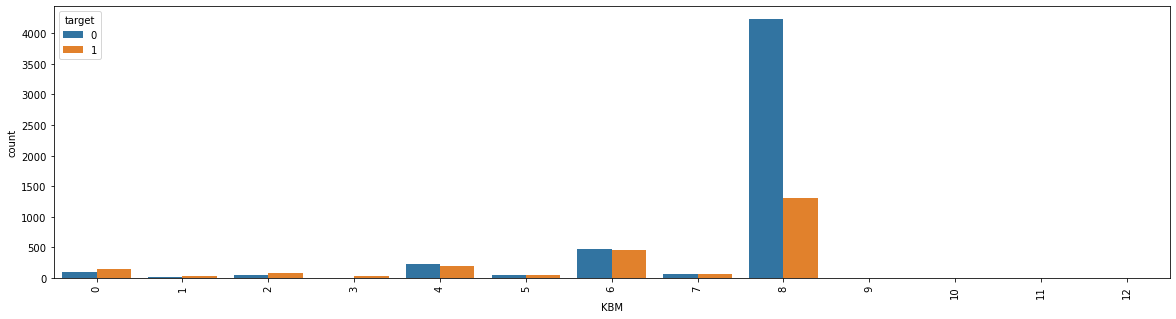

KBM_prol_est


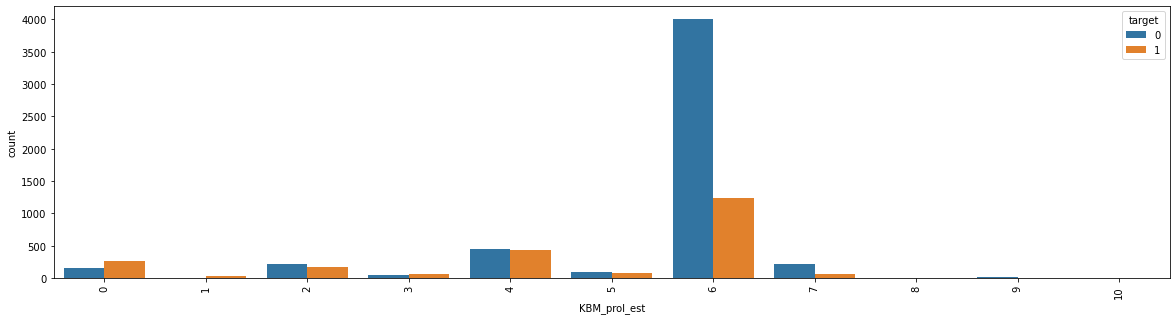

delta_kbm


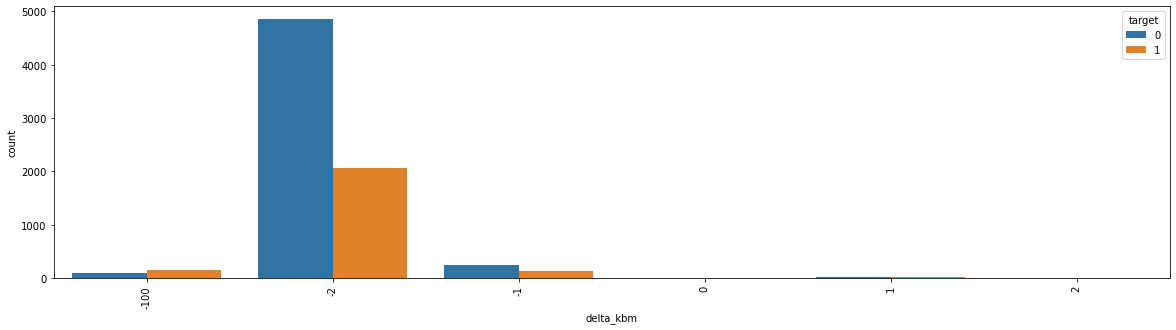

deduct


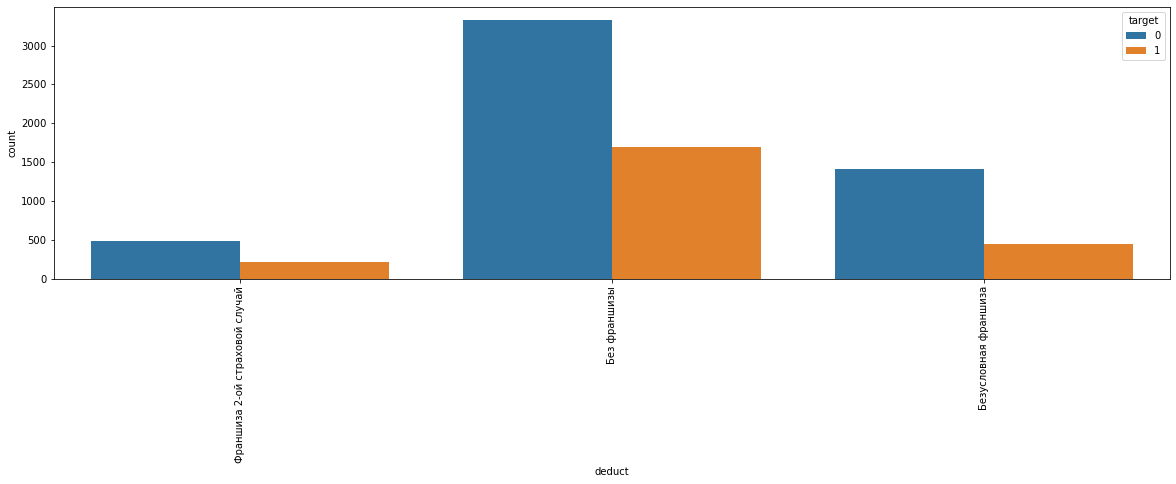

deduct_amount


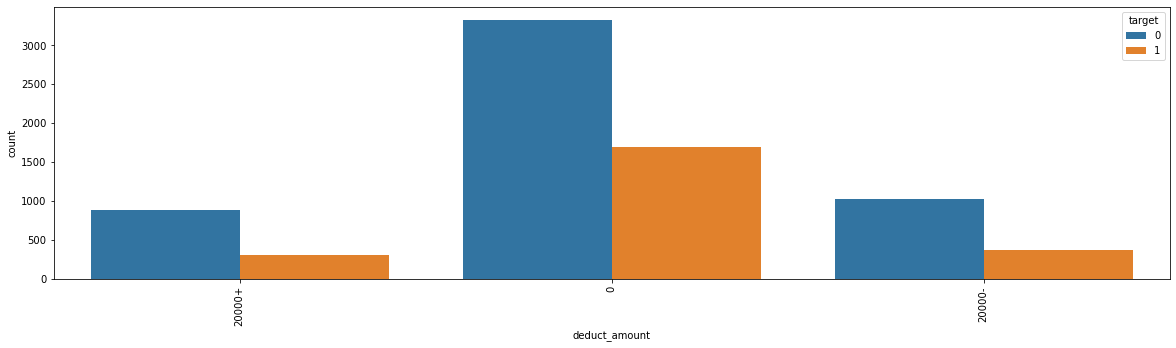

product


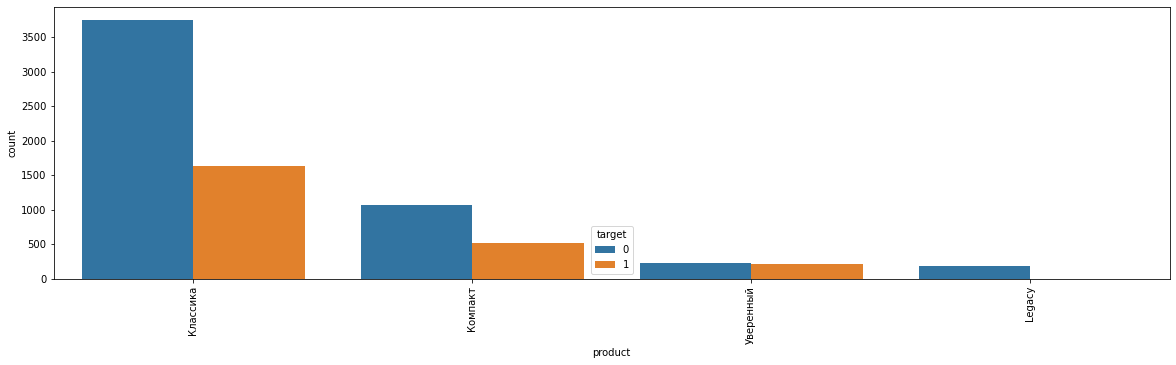

Bank


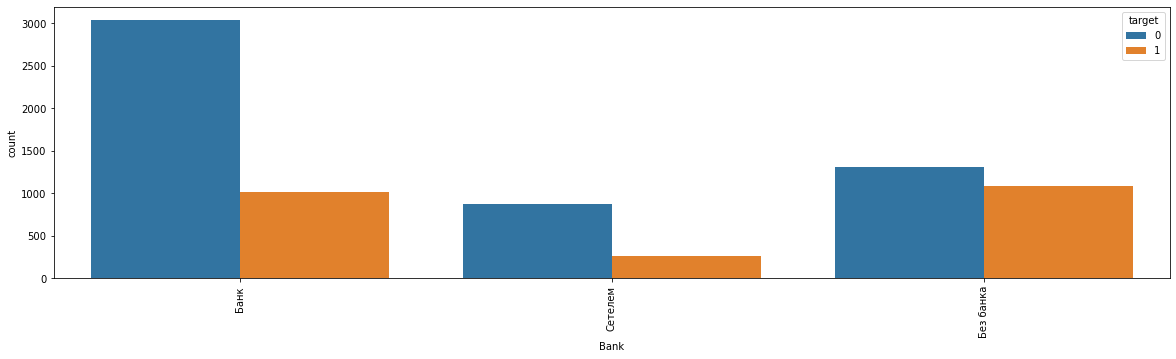

channel - map


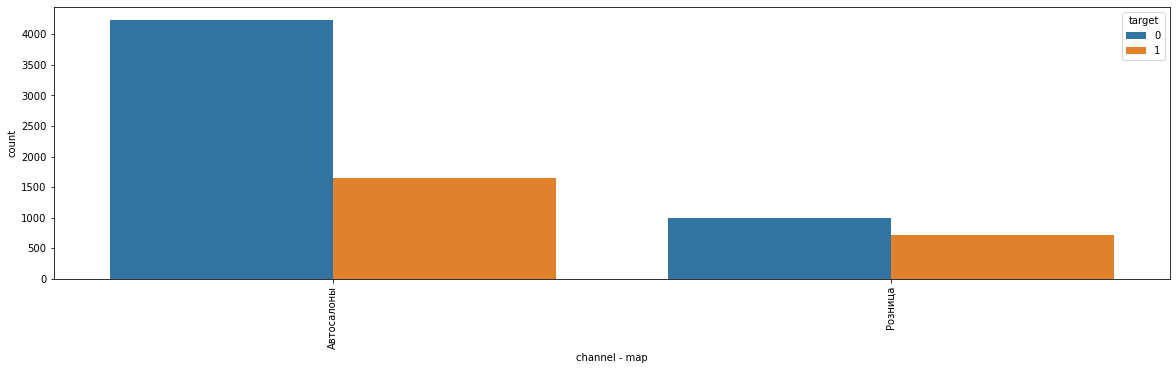

category


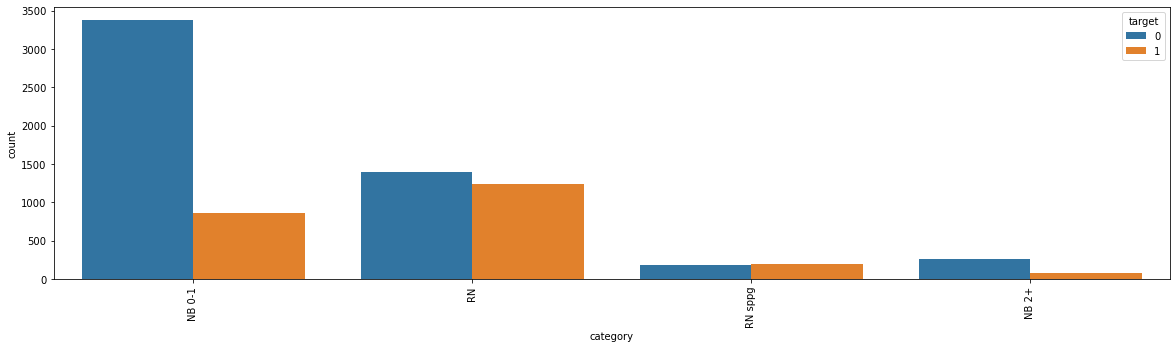

kvs_type


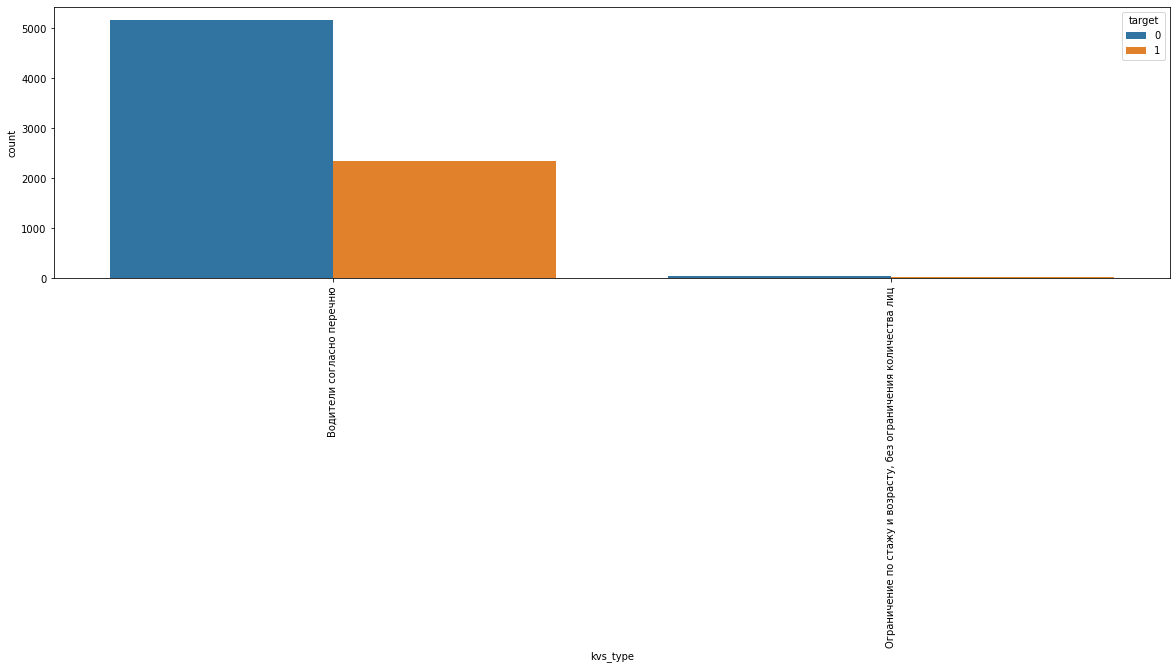

Age


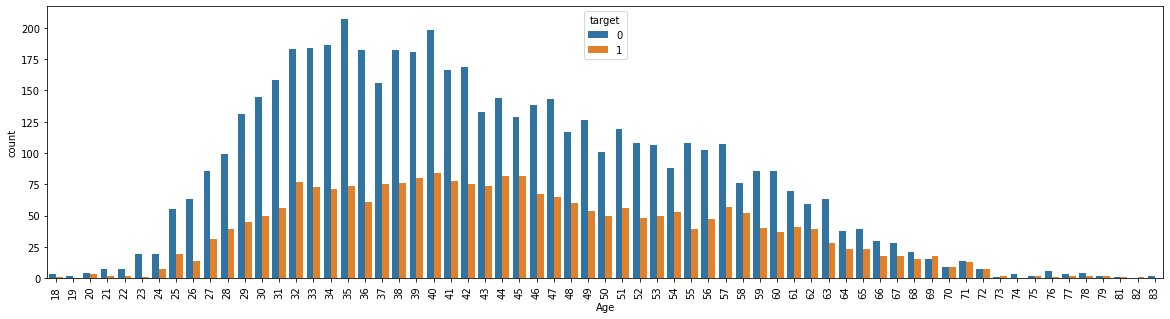

Exp


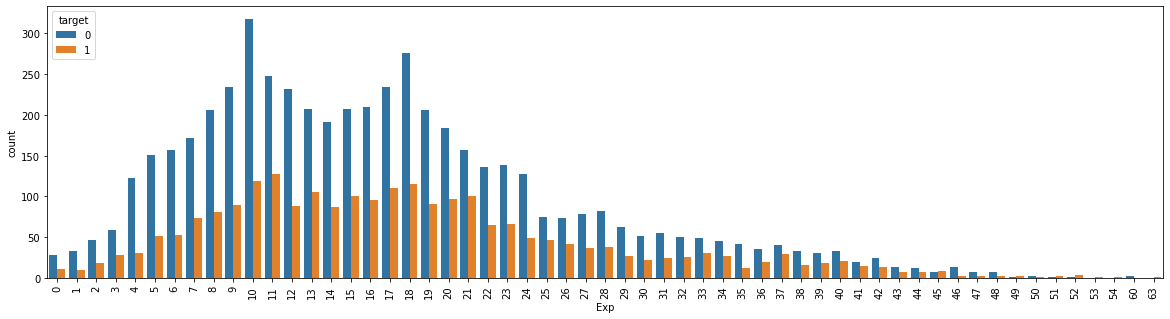

discount


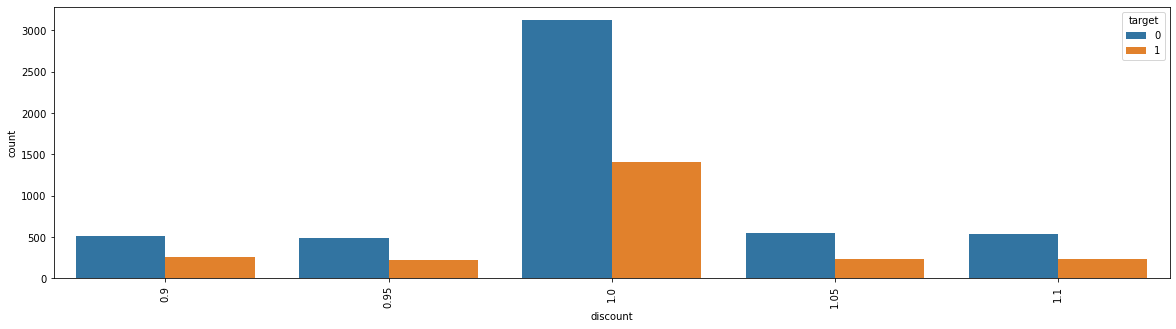

Amount - gr


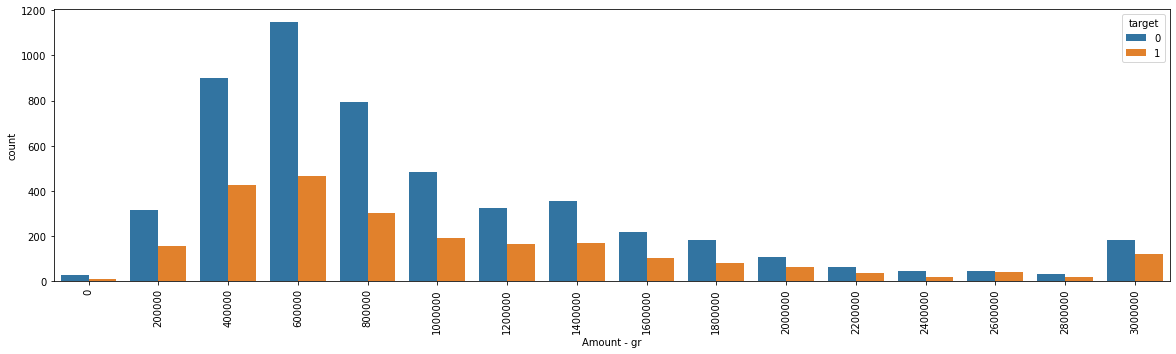

sex


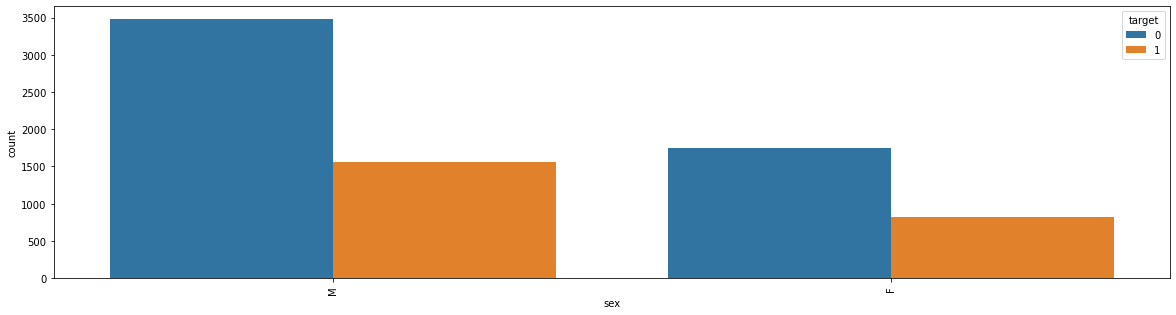

premium_car


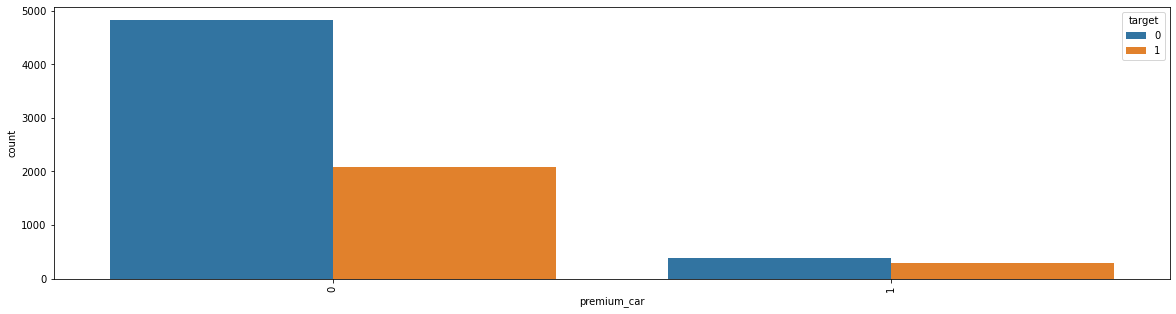

price_gr


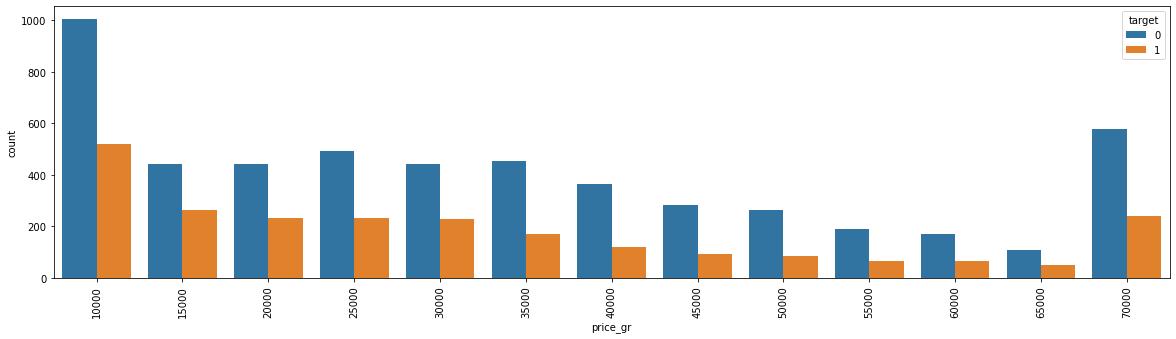

price_prc


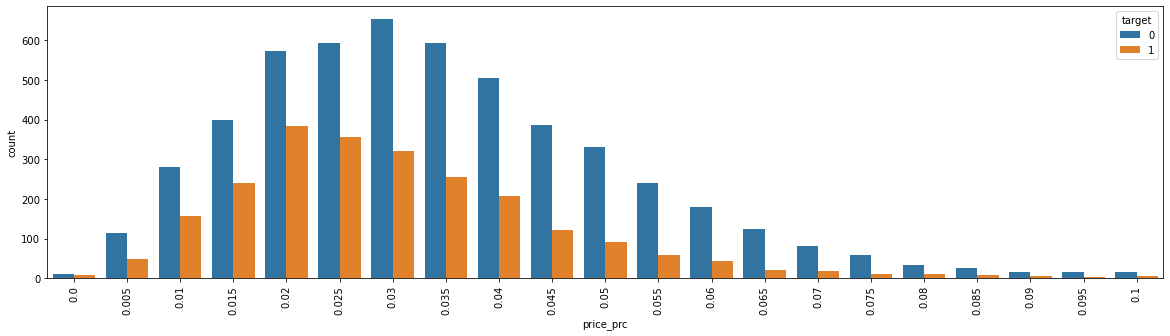

OSAGO_clnt


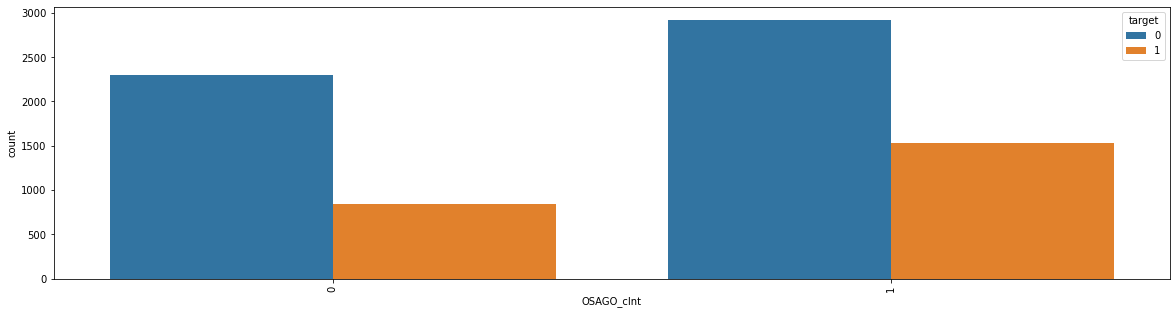

target


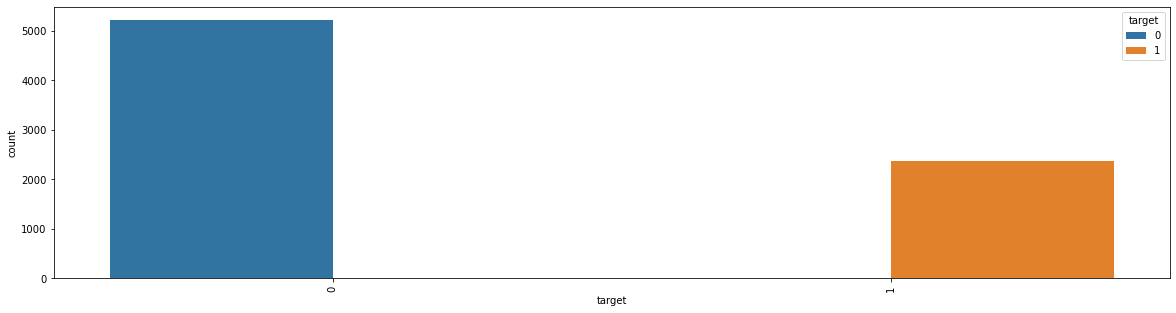

Car


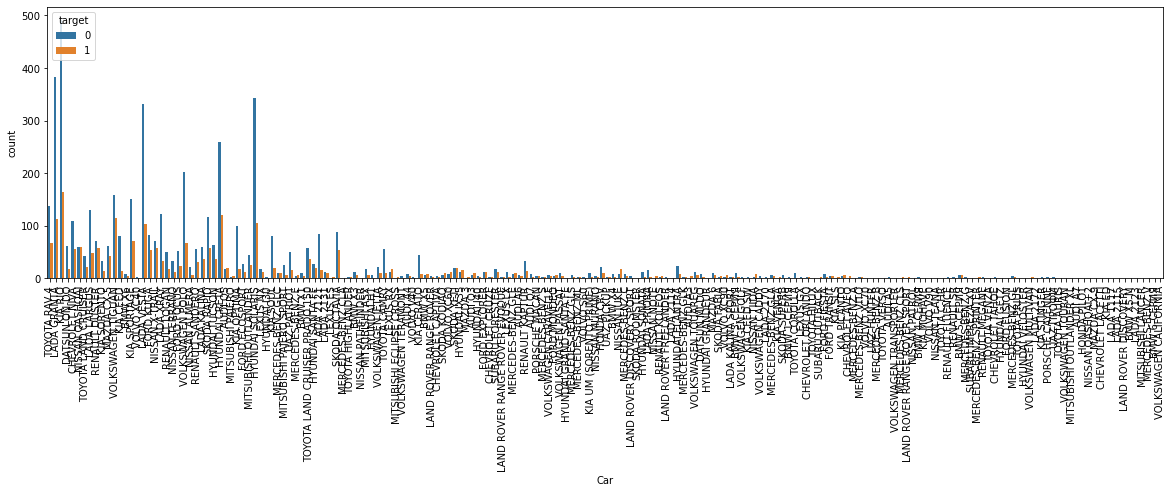

In [10]:
# создадим графики по каждой фиче, где будет соотношение всех уникальных значений
for col in df_train.columns[1:]:
    print(col)
    plt.figure(figsize=(20,5))
    plt.xticks(rotation='vertical')
    sns.countplot(x=col, hue='target', data=df_train);
    plt.show()

In [84]:
# # еще один способ визуализации 
# for feat in df_train.columns[1:]:
#     print(feat)
#     plt.figure(figsize=(10,5))
#     sns.barplot(x=df_train[feat], y=df_train['target'])
#     plt.show()

####  после анализа и первых попыток построить модель, пробуем упростить наши данные
####  колонку passport_region удалим, т. к. она дублирует колонку Filial
####  в остальных колонках сгруппируем некоторые значения, чтобы у нас было меньше категорий 

In [11]:
df = df.drop(['passport_region'], axis = 1)

In [12]:
df['VIP'] = ['Без статуса' if row == 'Без статуса' else 'Особый статус' for row in df['VIP']]

In [13]:
df['Yr_production'] = ['до 2018' if row <= 2017 else 'после 2018' for row in df['Yr_production']]

In [14]:
df['KBM'] = ['до 8' if row <= 7 else 'полсе 8' for row in df['KBM']]

In [15]:
df['KBM_prol_est'] = ['до 6' if row <= 5 else 'полсе 6' for row in df['KBM_prol_est']]

In [16]:
df['delta_kbm'] = ['до -2' if row <= -2 else 'полсе -2' for row in df['delta_kbm']]

In [17]:
df['deduct'] = ['Без франшизы' if row == 'Без франшизы' else 'С франшизой' for row in df['deduct']]

In [18]:
df['deduct_amount'] = ['0' if row == '0' else '2000' for row in df['deduct_amount']]

In [19]:
df['product'] = ['Классика' if row == 'Классика' else 'Не классика' for row in df['product']]

In [20]:
df['Bank'] = ['Без банка' if row == 'Без банка' else 'Банк' for row in df['Bank']]

# Андерсэмплинг и оверсэмплинг

In [21]:
# посмотрим на кол-во классов в нашем обучающем дф, видно, что классы не сбалансированы
num_0 = len(df[df['target']==0])
num_1 = len(df[df['target']==1])
print(num_0,num_1)

5226 2372


In [22]:
# # делаем сбалансированный дф, где кол-во значений в каждом классе будет равно кол-ву меньшего класса
# undersampled_data = pd.concat([df[df['target']==0].sample(num_1) , df[df['target']==1] ])
# undersampled_data = undersampled_data.drop(['ID'], axis = 1).reset_index(drop = True)
# print(len(undersampled_data))

In [23]:
# делаем сбалансированный дф, где кол-во значений в каждом классе будет равно кол-ву большего класса
oversampled_data = pd.concat([df[df['target']==0] , df[df['target']==1].sample(num_0, replace=True) ])
oversampled_data = oversampled_data.drop(['ID'], axis = 1).reset_index(drop = True)
print(len(oversampled_data))

10452


Filial


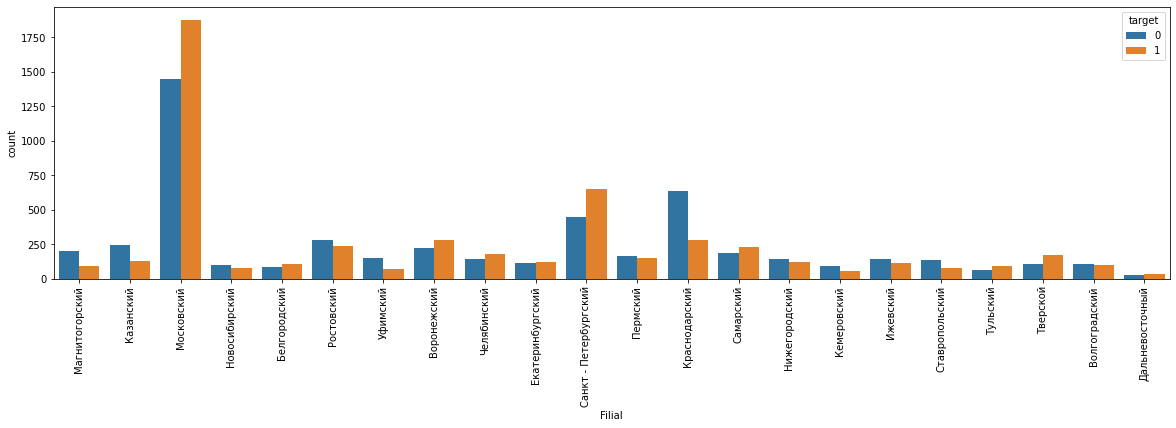

Type_ts


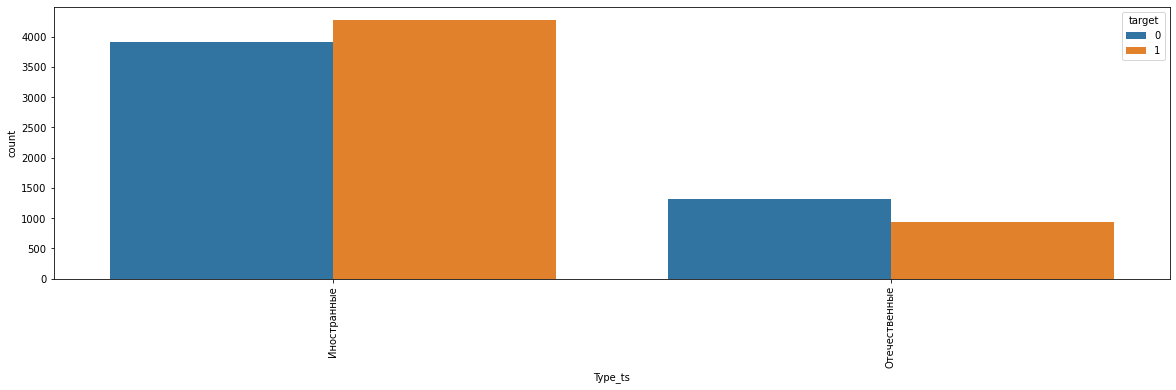

VIP


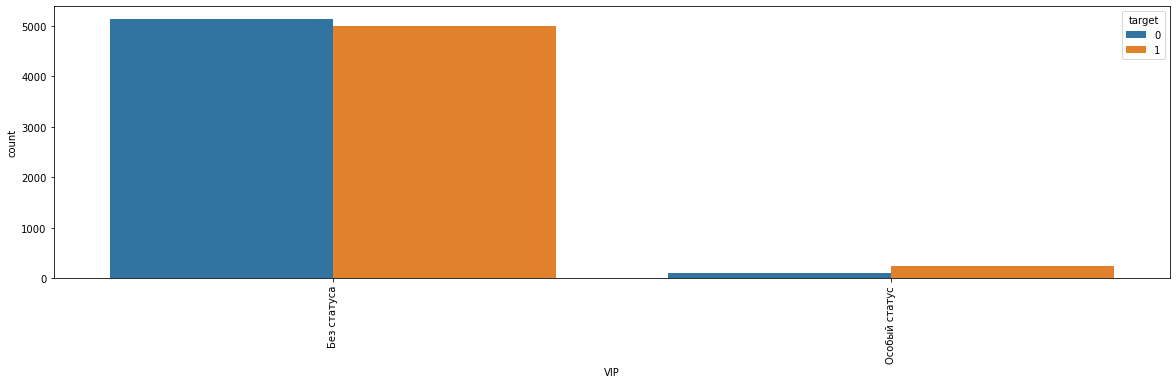

Yr_production


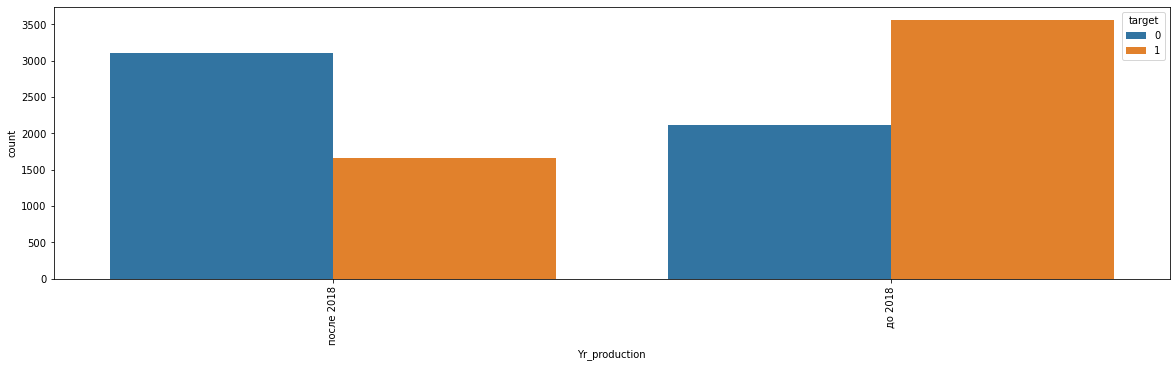

GAP


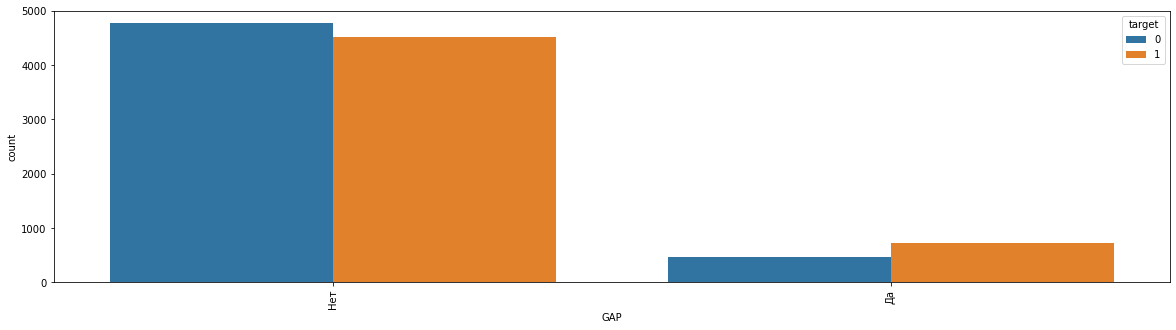

married


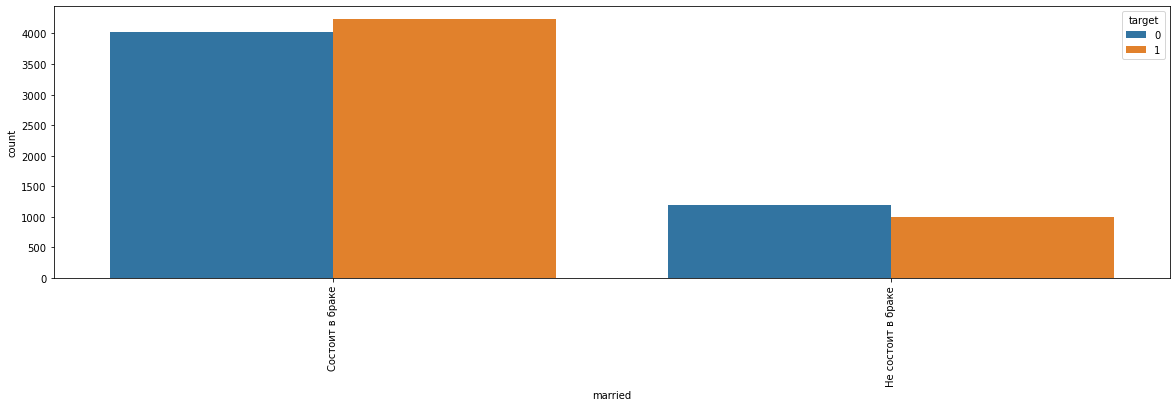

KBM


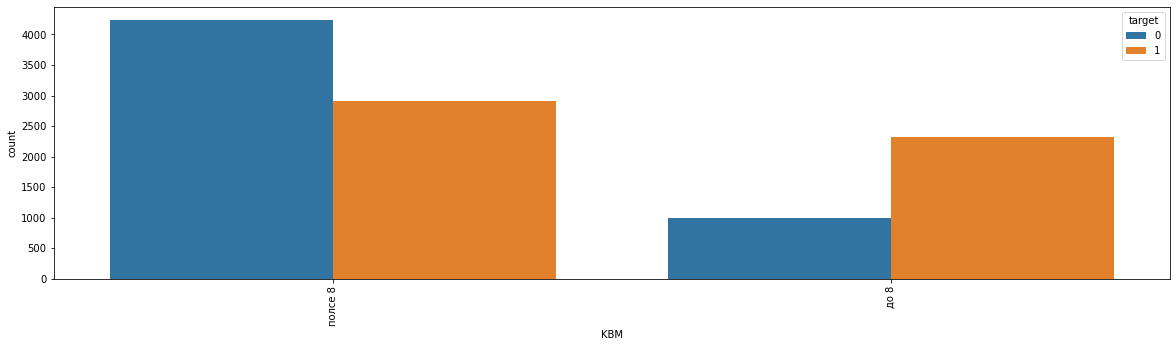

KBM_prol_est


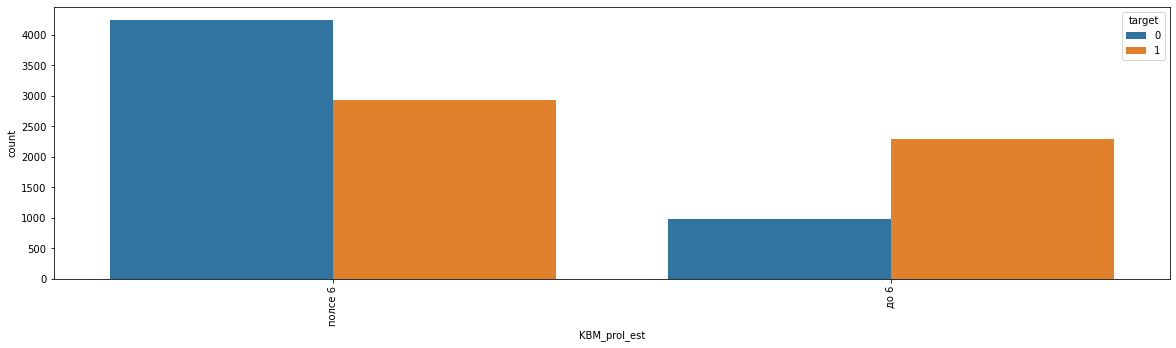

delta_kbm


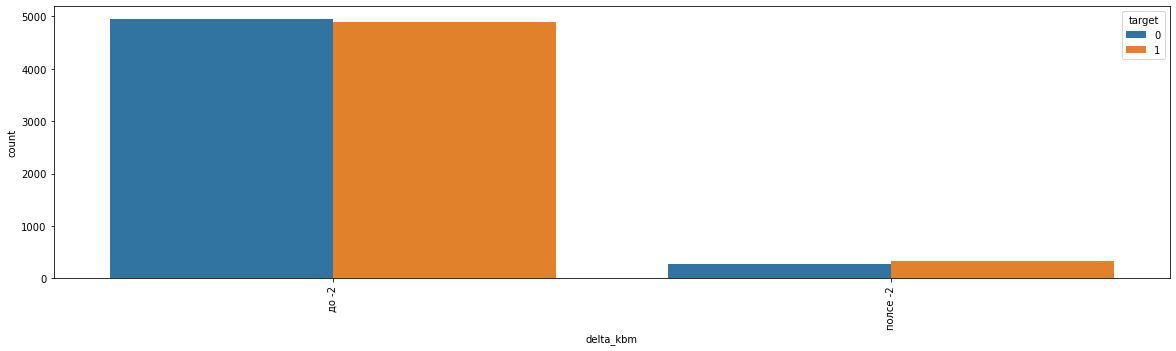

deduct


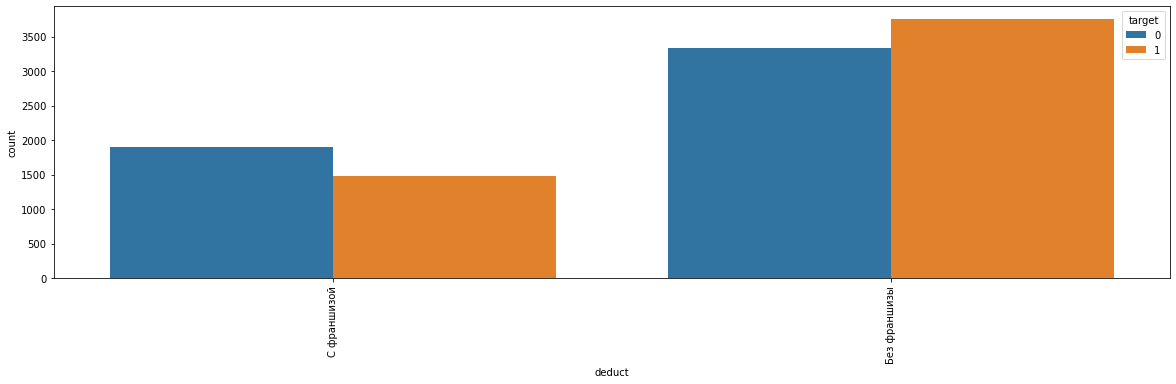

deduct_amount


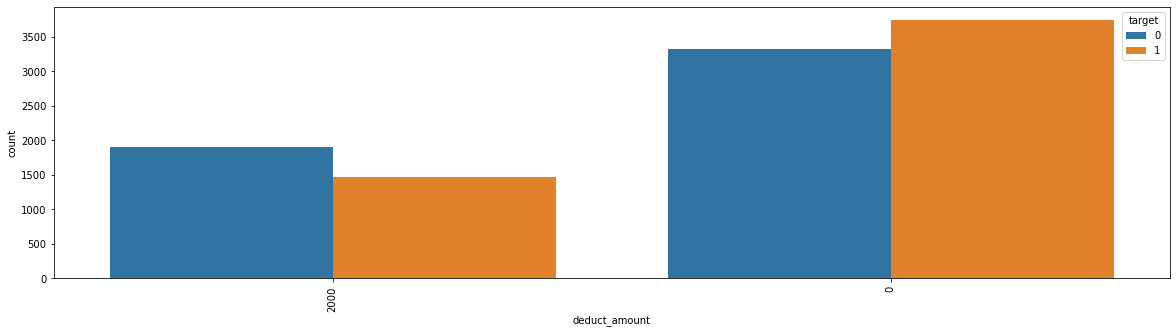

product


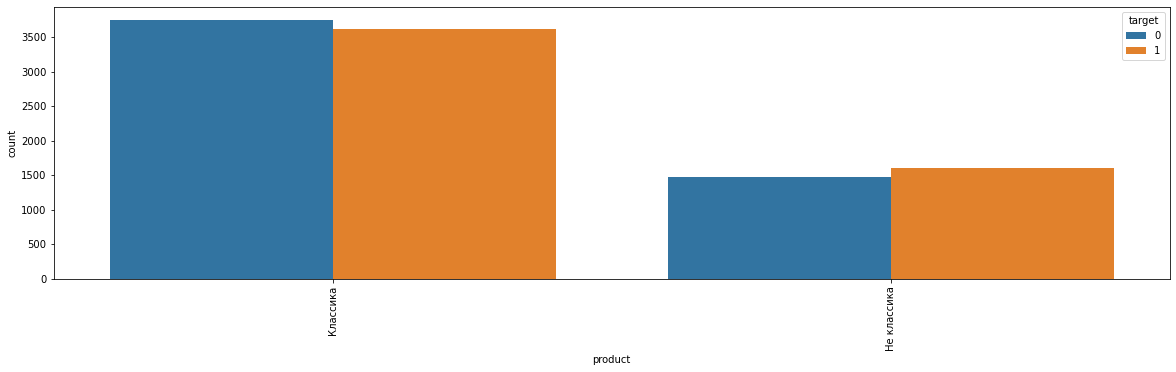

Bank


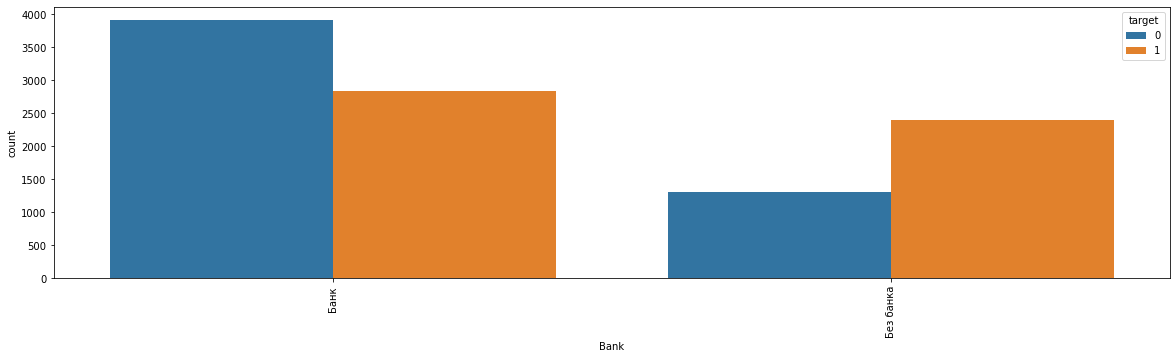

channel - map


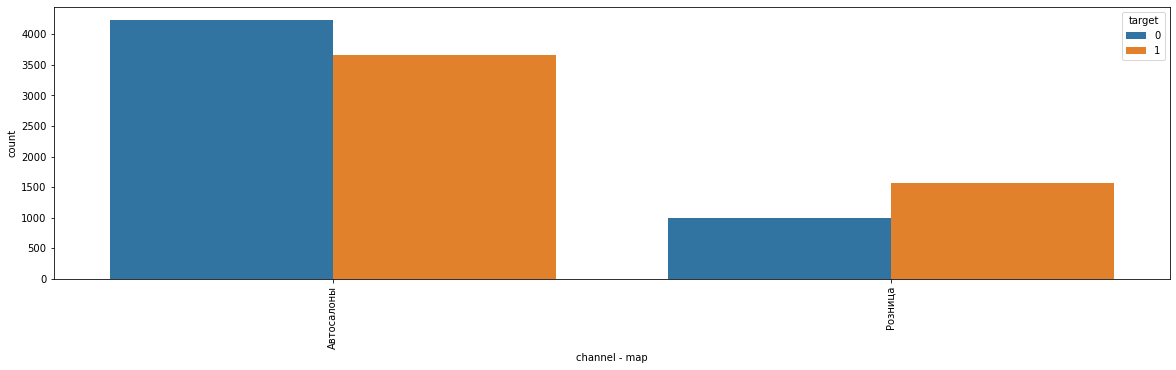

category


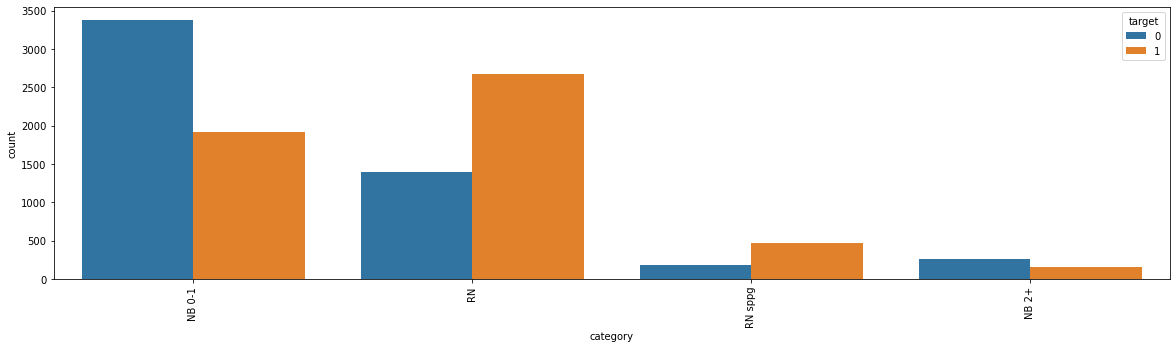

kvs_type


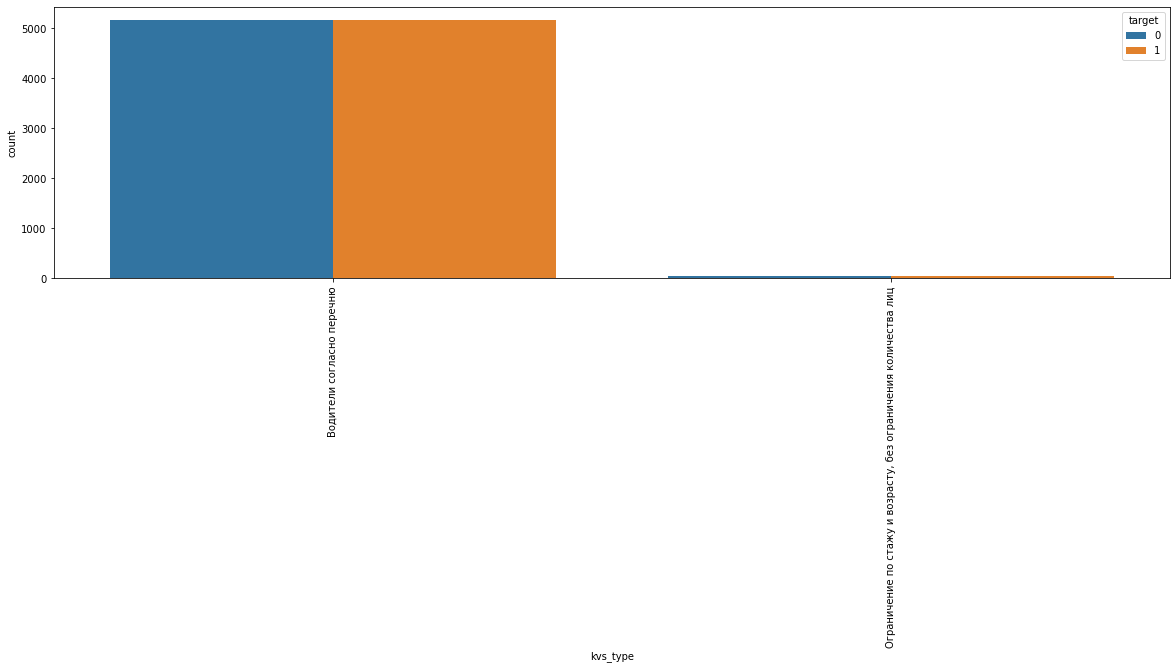

Age


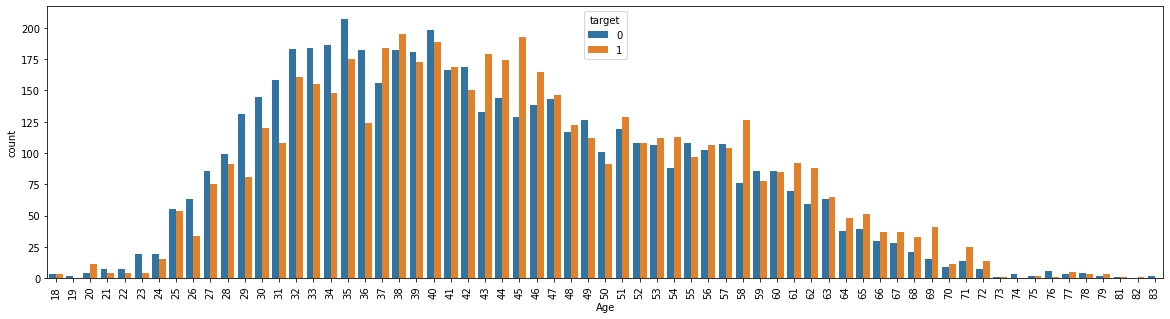

Exp


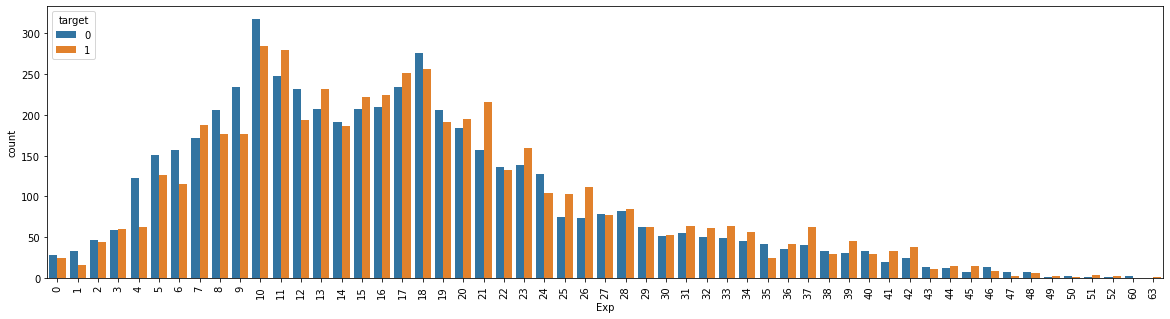

discount


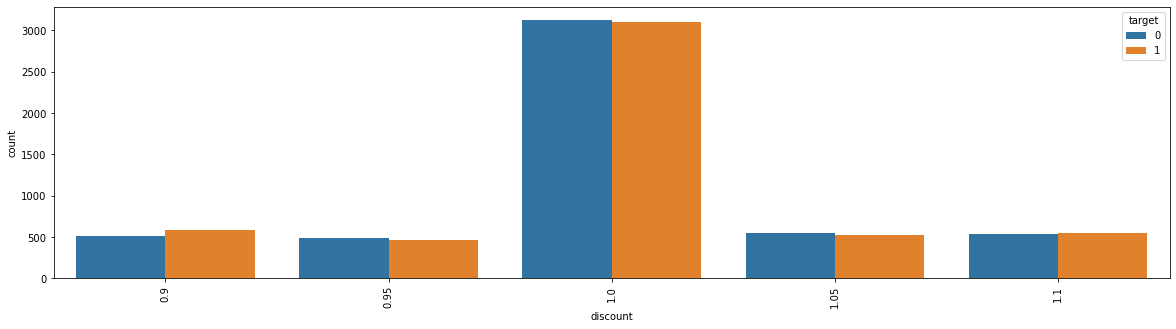

Amount - gr


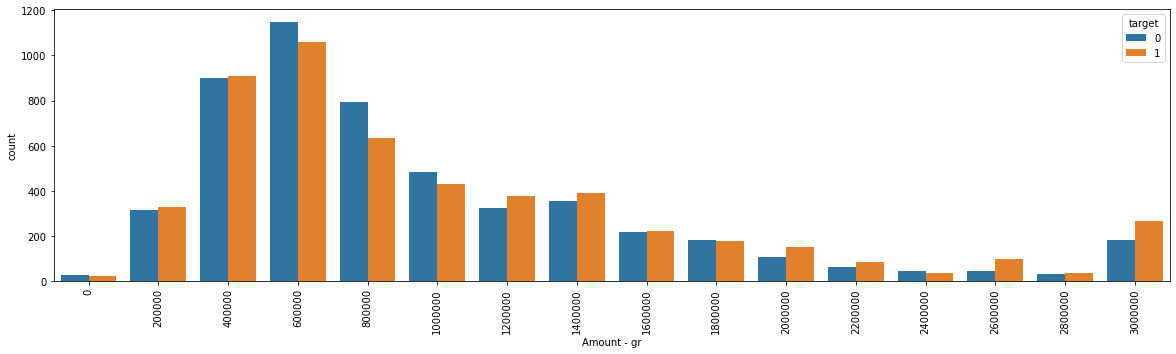

sex


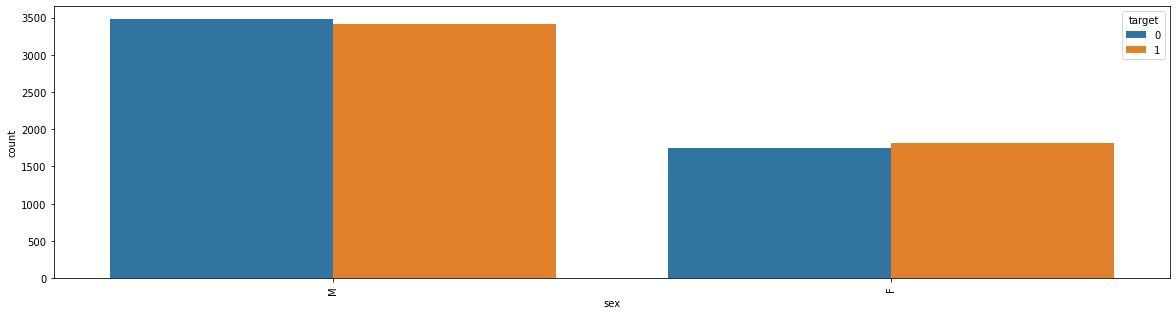

premium_car


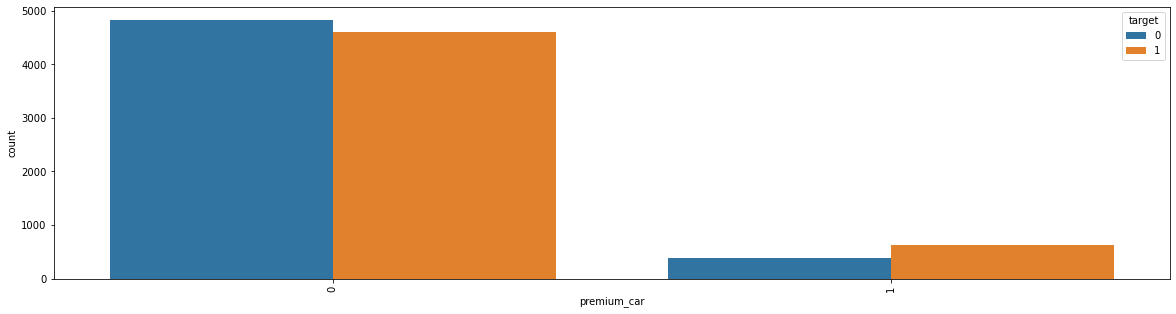

price_gr


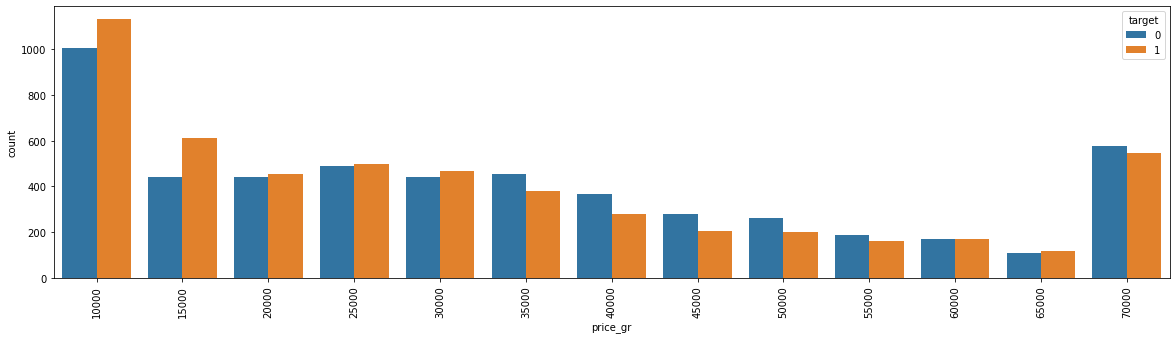

price_prc


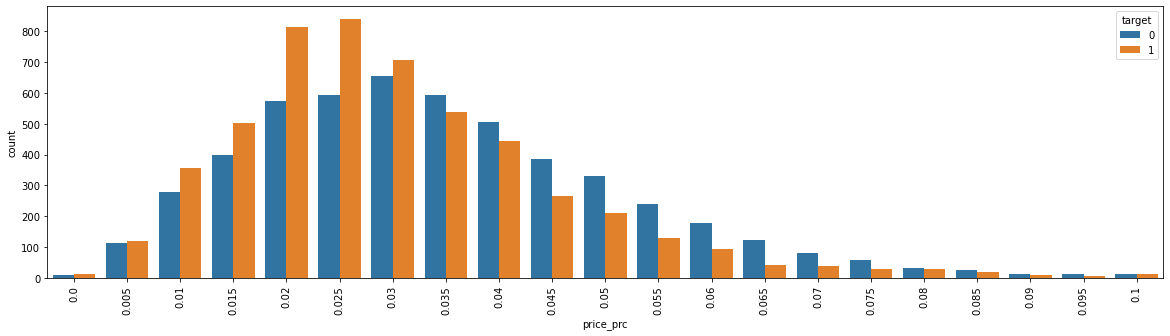

OSAGO_clnt


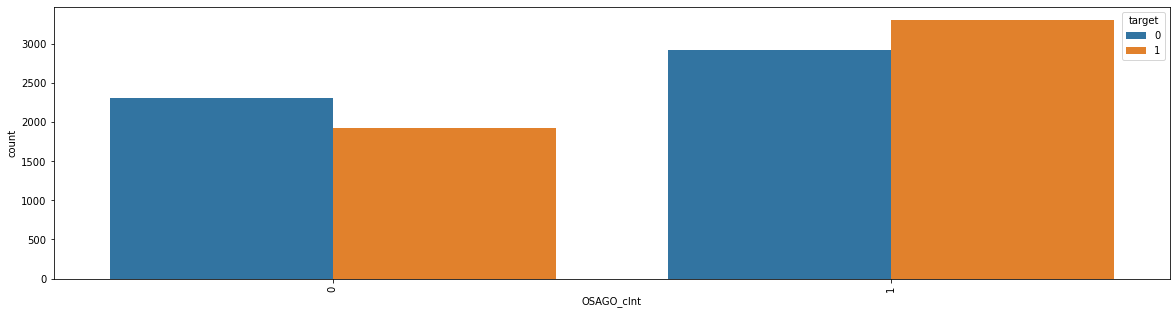

target


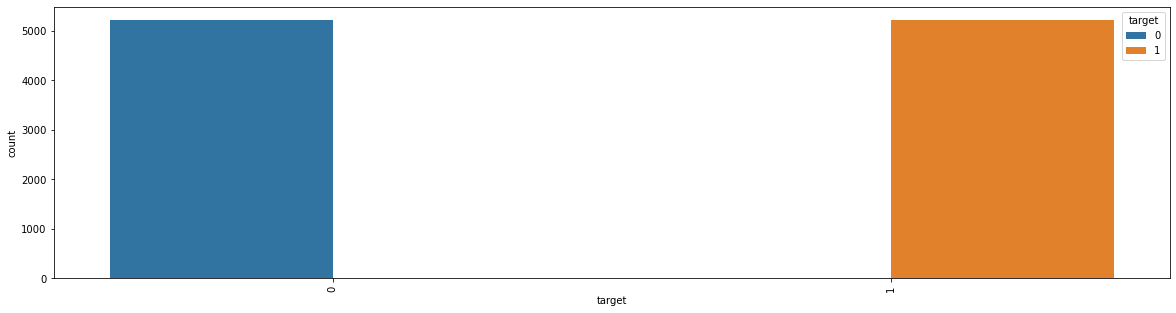

Car


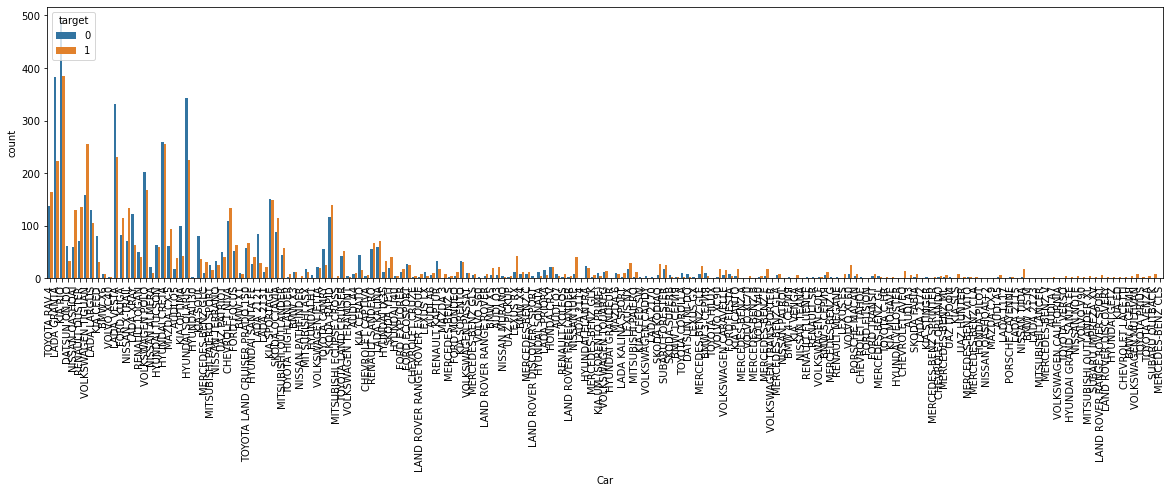

In [25]:
# еще раз визуализуруем уже после оверсэмплинга и группировки категорий
for col in oversampled_data.columns:
    print(col)
    plt.figure(figsize=(20,5))
    plt.xticks(rotation='vertical')
    sns.countplot(x=col, hue='target', data=oversampled_data);
    plt.show()

# Подготовка данных к обучению

In [107]:
# создадим дф, где нет размеченных данных
df_test = df[7599:]
df_test = df_test.drop(['ID'], axis = 1).reset_index(drop = True)

In [108]:
# посмотрим на размерность дф_теста и оверсэмплинга_дата
df_test.shape, oversampled_data.shape

((3264, 27), (10452, 27))

In [116]:
# соединим дф_теста и оверсэмплинга_дата
oversampled_data_test = pd.concat([oversampled_data, df_test], axis=0)
oversampled_data_test.shape

(13716, 27)

In [117]:
# записываем все категориальные колонки в переменную 
categorical = oversampled_data_test.select_dtypes(include='object').columns
print(len(categorical))
categorical

18


Index(['Filial', 'Type_ts', 'VIP', 'Yr_production', 'GAP', 'married', 'KBM',
       'KBM_prol_est', 'delta_kbm', 'deduct', 'deduct_amount', 'product',
       'Bank', 'channel - map', 'category', 'kvs_type', 'sex', 'Car'],
      dtype='object')

In [137]:
# разбиваем все категориальные колонки на отдельные колонки 
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit(oversampled_data_test[categorical])
cat_enc_cols = [f'{c}_{el}' for arr, c in zip(onehot_encoder.categories_, categorical) for el in arr]
df_cat = pd.DataFrame(onehot_encoder.fit_transform(oversampled_data_test[categorical]), columns=cat_enc_cols)
df_cat.reset_index(inplace=True, drop = True)

In [135]:
# необходимо из oversampled_data удалить все категориальные колонки, чтобы oversampled_data соединить с df_cat
# создадим копию df
df_copy = oversampled_data_test.copy()
# и теперь из нашей копии удаляем все категориальные колонки
for col in categorical:
    del df_copy[col]
df_copy.reset_index(inplace=True, drop = True)

In [138]:
# смотрим, что кол-во строк в дф_коп и дф_кат совпадает, можно объединять
df_copy.shape, df_cat.shape

((13716, 9), (13716, 253))

In [139]:
# объединяем дф_коп и дф_кат
df_new = pd.concat([df_copy, df_cat], axis=1)
df_new

,Age,Exp,discount,Amount - gr,premium_car,price_gr,price_prc,OSAGO_clnt,target,Filial_Белгородский,...,Car_VOLKSWAGEN TIGUAN,Car_VOLKSWAGEN TOUAREG,Car_VOLKSWAGEN TRANSPORTER,Car_VOLVO S60,Car_VOLVO V40,Car_VOLVO V90,Car_VOLVO XC40,Car_VOLVO XC60,Car_VOLVO XC70,Car_VOLVO XC90
0,42,24,1.00,1400000,0,55000,0.040,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41,4,1.05,200000,0,10000,0.010,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40,15,1.10,400000,0,10000,0.020,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,58,23,1.00,400000,0,10000,0.015,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,70,18,1.00,400000,0,20000,0.055,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13711,44,21,1.00,1800000,0,70000,0.035,1,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13712,33,15,1.00,200000,0,20000,0.080,1,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13713,55,36,1.05,600000,0,10000,0.010,0,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13714,60,32,1.00,400000,0,30000,0.050,0,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# # сохраняем полученый дф в файл
#df_new.to_csv('train.csv')

In [141]:
# создаем features и target

features = [
    'Age', 'Exp', 'discount', 'Amount - gr', 'premium_car', 
    'price_gr', 'price_prc', 'OSAGO_clnt']

for col in df_cat.columns.to_list():
    features.append(col)

target = ['target']
len(features)

261

In [148]:
# конвертируем в numpy
# разбиваем датафрейм на значение х и у и конвертируем в нампай. 
# вместо таблицы: (колонок и строк) теперь у нас численные значения в массивах. 
x, y = df_new[features][:10452].to_numpy(), df_new[target][:10452].to_numpy()
x.shape, y.shape 

((10452, 261), (10452, 1))

In [150]:
# конвертируем данные для теста
test = df_new[features][10452:].to_numpy()
test.shape

(3264, 261)

In [156]:
# нормируем данные
# для того, чтобы все данные в нашем нампае прировнять к единому виду(от -1 до 1)
x_norm = StandardScaler().fit_transform(x)
x_norm.shape 

(10452, 261)

In [151]:
# нормируем тестовые данные
test_norm = StandardScaler().fit_transform(test)
test_norm.shape

(3264, 261)

In [157]:
# разбиваем на трейн/тест выборки
x_norm_train, x_norm_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.3, random_state=1)
x_norm_train.shape, x_norm_test.shape, y_train.shape, y_test.shape

((7316, 261), (3136, 261), (7316, 1), (3136, 1))

# Создание моделей

In [55]:
# для начала создадим несколько стандартных моделей без параметров и посмотрим на результат

In [158]:
lr = LogisticRegression()
lr.fit(x_norm_train, ravel(y_train))

LogisticRegression()

In [159]:
print(f'Roc_auc score is {roc_auc_score(y_test, lr.predict(x_norm_test))}')
print(f'Accuracy score is {accuracy_score(y_test, lr.predict(x_norm_test))}')
print(f'F1 score is {f1_score(y_test, lr.predict(x_norm_test))}')

Roc_auc score is 0.6661835184768587
Accuracy score is 0.6658163265306123
F1 score is 0.6718847839699437


In [160]:
knn = KNeighborsClassifier()
knn.fit(x_norm_train, ravel(y_train))

KNeighborsClassifier()

In [161]:
print(f'Roc_auc score is {roc_auc_score(y_test, knn.predict(x_norm_test))}')
print(f'Accuracy score is {accuracy_score(y_test, knn.predict(x_norm_test))}')
print(f'F1 score is {f1_score(y_test, knn.predict(x_norm_test))}')

Roc_auc score is 0.6896010183131198
Accuracy score is 0.6884566326530612
F1 score is 0.7105185185185185


In [162]:
tree = DecisionTreeClassifier()
tree.fit(x_norm_train, ravel(y_train))

DecisionTreeClassifier()

In [163]:
print(f'Roc_auc score is {roc_auc_score(y_test, tree.predict(x_norm_test))}')
print(f'Accuracy score is {accuracy_score(y_test, tree.predict(x_norm_test))}')
print(f'F1 score is {f1_score(y_test, tree.predict(x_norm_test))}')

Roc_auc score is 0.806536169194889
Accuracy score is 0.8051658163265306
F1 score is 0.8215016067776804


In [164]:
svm = SVC()
svm.fit(x_norm_train, ravel(y_train))

SVC()

In [165]:
print(f'Roc_auc score is {roc_auc_score(y_test, svm.predict(x_norm_test))}')
print(f'Accuracy score is {accuracy_score(y_test, svm.predict(x_norm_test))}')
print(f'F1 score is {f1_score(y_test, svm.predict(x_norm_test))}')

Roc_auc score is 0.6877101908198049
Accuracy score is 0.6871811224489796
F1 score is 0.6963788300835655


In [166]:
rfc = RandomForestClassifier()
rfc.fit(x_norm_train, ravel(y_train))

RandomForestClassifier()

In [167]:
print(f'Roc_auc score is {roc_auc_score(ravel(y_test), rfc.predict(x_norm_test))}')
print(f'Accuracy score is {accuracy_score(ravel(y_test), rfc.predict(x_norm_test))}')
print(f'F1 score is {f1_score(ravel(y_test), rfc.predict(x_norm_test))}')

Roc_auc score is 0.8376280366433255
Accuracy score is 0.8367346938775511
F1 score is 0.8453172205438068


In [ ]:
# т. к. лучший результат без параметов показал случайный лес, попробуем его улучшить с помощью GridSearchCV

In [168]:
rfc2 = RandomForestClassifier()

rfc_params={
    'n_estimators' : [135, 140, 145],
    'criterion' : ['gini'],
    'max_depth' : [20, 22],
    'min_samples_split' : [2],
    'min_samples_leaf' : [1]}

rfc_gs = GridSearchCV(
    estimator=rfc2,
    param_grid=rfc_params,
    scoring='f1',
    cv=5,
    verbose=4,
    n_jobs=-1,
    return_train_score=True)

rfc_gs.fit(x_norm_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [20, 22],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [135, 140, 145]},
             return_train_score=True, scoring='f1', verbose=4)

In [169]:
# лучшие параметры после нескольких попыток настройки модели
rfc_gs.best_params_

{'criterion': 'gini',
 'max_depth': 22,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 145}

In [170]:
print(f'Roc_auc score is {roc_auc_score(ravel(y_train), rfc_gs.best_estimator_.predict(x_norm_train))}')
print(f'Accuracy score is {accuracy_score(ravel(y_train), rfc_gs.best_estimator_.predict(x_norm_train))}')
print(f'F1 score is {f1_score(ravel(y_train), rfc_gs.best_estimator_.predict(x_norm_train))}')
print('-----')
print(f'Roc_auc score is {roc_auc_score(ravel(y_test), rfc_gs.best_estimator_.predict(x_norm_test))}')
print(f'Accuracy score is {accuracy_score(ravel(y_test), rfc_gs.best_estimator_.predict(x_norm_test))}')
print(f'F1 score is {f1_score(ravel(y_test), rfc_gs.best_estimator_.predict(x_norm_test))}')

Roc_auc score is 0.9799865819893587
Accuracy score is 0.9800437397484965
F1 score is 0.980349932705249
-----
Roc_auc score is 0.8200410628500807
Accuracy score is 0.8188775510204082
F1 score is 0.8316538233550682


# Предсказание неразмеченных данных

In [203]:
# удалим из дф_теста колонку таргет
df_test = df_test.drop(['target'], axis = 1)
df_test.head(5)

In [200]:
# создадим новый дф с предсказаниями случайного леса с измененными параметрами
target_pred = pd.DataFrame(rfc_gs.best_estimator_.predict(test_norm), columns = ['target_pred'])
target_pred.head(5)

,target_pred
0,1
1,0
2,1
3,0
4,1


In [201]:
# предсказания случайного леса с стандартными параметрами
target_pred2 = pd.DataFrame(rfc.predict(test_norm), columns = ['target_pred'])
target_pred2.head(5)

,target_pred
0,1
1,0
2,1
3,0
4,1


In [199]:
# сравнение кол-во значений в предсказаниях
print(target_pred['target_pred'].value_counts())
print(target_pred2['target_pred'].value_counts())

0    2186
1    1078
Name: target_pred, dtype: int64
0    2327
1     937
Name: target_pred, dtype: int64


In [192]:
# объеденим дф_тест и предсказания случайного леса с изменеными параметрами
df_final = pd.concat([df_test, target_pred], axis=1)
df_final

,Filial,Type_ts,VIP,Yr_production,GAP,married,KBM,KBM_prol_est,delta_kbm,deduct,...,Exp,discount,Amount - gr,sex,premium_car,price_gr,price_prc,OSAGO_clnt,Car,target_pred
0,Московский,Иностранные,Без статуса,до 2018,Нет,Состоит в браке,полсе 8,полсе 6,до -2,Без франшизы,...,20,1.10,1000000,F,0,45000,0.040,1,TOYOTA RAV 4,1
1,Московский,Иностранные,Без статуса,после 2018,Нет,Не состоит в браке,полсе 8,полсе 6,до -2,Без франшизы,...,12,0.95,1200000,M,0,30000,0.025,1,HYUNDAI CRETA,0
2,Казанский,Иностранные,Без статуса,до 2018,Нет,Состоит в браке,до 8,до 6,до -2,Без франшизы,...,24,1.00,800000,M,0,10000,0.010,1,KIA SORENTO,1
3,Нижегородский,Отечественные,Без статуса,до 2018,Нет,Не состоит в браке,до 8,до 6,до -2,С франшизой,...,23,1.00,600000,M,0,10000,0.020,0,UAZ PATRIOT,0
4,Московский,Иностранные,Без статуса,до 2018,Нет,Состоит в браке,полсе 8,полсе 6,до -2,Без франшизы,...,35,1.10,1400000,M,0,25000,0.015,0,MITSUBISHI OUTLANDER,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,Кемеровский,Иностранные,Без статуса,после 2018,Нет,Состоит в браке,полсе 8,полсе 6,до -2,Без франшизы,...,21,1.00,1800000,M,0,70000,0.035,1,HYUNDAI GRAND SANTA FE,0
3260,Ижевский,Отечественные,Без статуса,до 2018,Нет,Не состоит в браке,до 8,до 6,до -2,Без франшизы,...,15,1.00,200000,M,0,20000,0.080,1,LADA GRANTA,0
3261,Новосибирский,Иностранные,Без статуса,до 2018,Да,Состоит в браке,полсе 8,полсе 6,до -2,Без франшизы,...,36,1.05,600000,F,0,10000,0.010,0,KIA CERATO,0
3262,Ростовский,Отечественные,Без статуса,после 2018,Нет,Состоит в браке,полсе 8,полсе 6,до -2,Без франшизы,...,32,1.00,400000,M,0,30000,0.050,0,LADA GRANTA,0


In [204]:
# сохраним полученый файл
df_final.to_csv('final.csv')